# Principles of Automatic Control


Welcome to the course on "Principles of Automatic Control". In this interactive Jupyter notebook, we'll delve deep into the fundamental principles, concepts, and terminologies used in the field of control engineering.


## Introduction to Control Systems

Control engineering or control systems engineering deals with designing systems to behave in a desired manner. Today, control systems are integral to our daily lives, and they have a vast range of applications.


### Control System Terminology

In our initial discussions, we'll focus on the terminologies used in control systems. It's crucial to get acquainted with these terms to have a clear understanding of the subsequent topics.

Let's begin!

### Importance of Control Systems

Modern civilization has heavily benefited from advances in control engineering. From household appliances like refrigerators, air conditioners, and heating systems to advanced setups in industries, space technology, robotics, and weapon systems, control engineering plays a pivotal role. 

> **Insert Picture**: A collage showcasing various systems and industries where control engineering is applied.

Feedback control theory, which we will be focusing on in this course, is also utilized in inventory control and socio-economic systems. While our primary focus will be on engineering systems, it's essential to note that the socio-economic and biological systems fall under cybernetics, which won't be discussed extensively in this course.


### Basic Control System Terminologies

Before we move forward, let's define some of the basic terminologies used in control systems:

- **Process/Plant/Controlled System**: The primary system we aim to control. It can be any system, machine, or process that needs automated control. For instance, in industries like chemical, petroleum, and power, there are specific applications requiring control of temperature, humidity, pressure, etc. These applications are often referred to as "process control applications."

- **Response Variable**: The output or the variable of the process we aim to control.

- **Manipulated Variable**: The variable we adjust or control to influence the response variable.

- **Controller**: An entity that regulates the manipulated variable based on the desired output.

- **Disturbance**: Any unwanted or unexpected change in the system which can affect the response variable. It can originate externally or internally within the process.

> **Insert Graph**: A simple graph showcasing how a disturbance can affect the output if not managed.

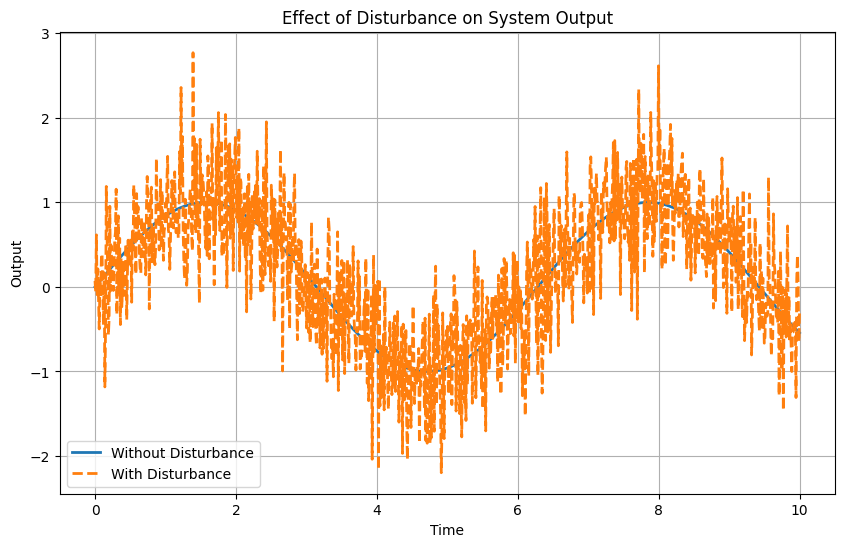

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the time and system parameters
time = np.linspace(0, 10, 1000)
system_output_without_disturbance = np.sin(time)
disturbance = np.random.normal(0, 0.5, len(time))
system_output_with_disturbance = system_output_without_disturbance + disturbance

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(time, system_output_without_disturbance, label="Without Disturbance", linewidth=2)
plt.plot(time, system_output_with_disturbance, label="With Disturbance", linestyle="--", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Output")
plt.title("Effect of Disturbance on System Output")
plt.legend()
plt.grid(True)
plt.show()

Historically, the application of control techniques began with process control, typically around the 1900 to 1940 era. During World War II, there was a pressing need for automatic airplane pilots, gun positioning systems, radar, antennae control systems, leading to the development of the theory of servomechanisms. The term "servomechanism" originates from "servo" meaning slave or servant, indicating a system that obeys a command, which was essential during the war.

With the convergence of various theories, a unified feedback control theory has emerged, encompassing different subfields.


### Block Diagram Representation

To understand how a basic control system operates, it's beneficial to use a block diagram representation.

<table><tr>
<td> <img src="./pics/01_intro_basic_elements.png" alt="01_intro_basic_elements" style="width: 650px;"/>    
</tr></table> 

_Figure: Block diagram representing the basic control system structure and it main components and signals._

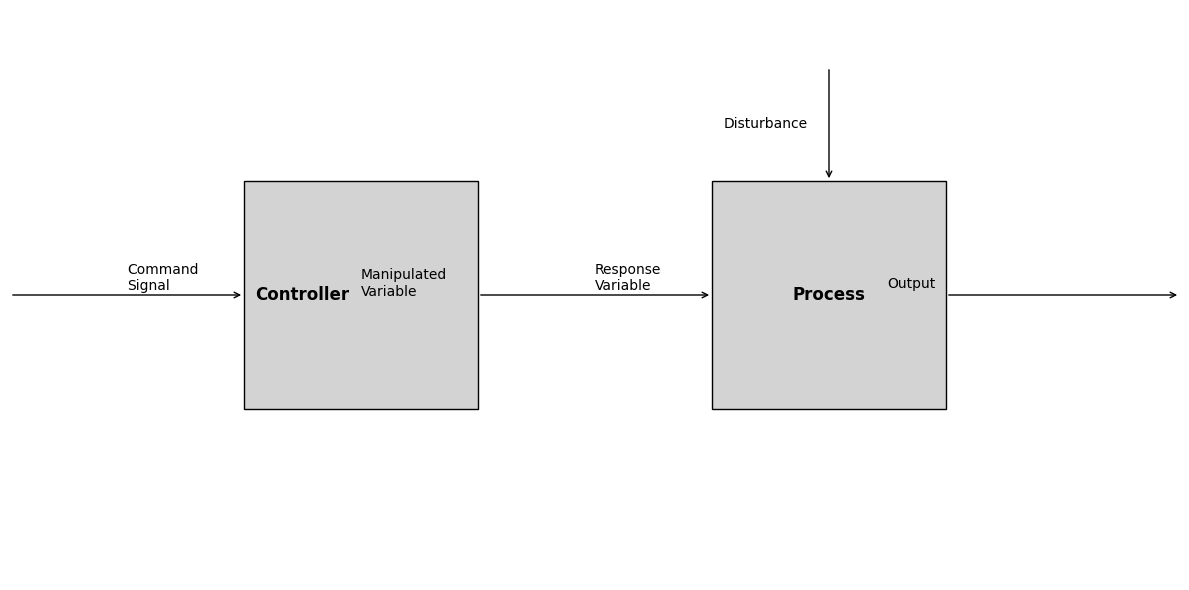

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create rectangles for blocks
process_rect = patches.Rectangle((0.6, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightgray', label="Process")
controller_rect = patches.Rectangle((0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightgray', label="Controller")

# Add rectangles to the axis
ax.add_patch(process_rect)
ax.add_patch(controller_rect)

# Text inside the blocks
ax.text(0.25, 0.5, 'Controller', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')
ax.text(0.7, 0.5, 'Process', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')

# Add arrows using annotate
ax.annotate("", xy=(0.2, 0.5), xytext=(0, 0.5), arrowprops=dict(arrowstyle="->"))
# ax.annotate("", xy=(0.4, 0.5), xytext=(0.2, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.6, 0.5), xytext=(0.4, 0.5), arrowprops=dict(arrowstyle="->"))
# ax.annotate("", xy=(0.8, 0.5), xytext=(0.6, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(1, 0.5), xytext=(0.8, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.7, 0.7), xytext=(0.7, 0.9), arrowprops=dict(arrowstyle="->"))

# Text for arrows
ax.text(0.1, 0.53, 'Command\nSignal', verticalalignment='center', fontsize=10)
ax.text(0.3, 0.52, 'Manipulated\nVariable', verticalalignment='center', fontsize=10)
ax.text(0.5, 0.53, 'Response\nVariable', verticalalignment='center', fontsize=10)
ax.text(0.75, 0.52, 'Output', verticalalignment='center', fontsize=10)
ax.text(0.61, 0.8, 'Disturbance', verticalalignment='center', fontsize=10)

# Set the limits, remove the axes and display
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.show()

### Open-Loop Control 
In an ideal scenario, the controller ensures the response variable follows the system commands, regardless of any disturbances. The control structure where the loop isn't closed, and the controller only has the command signal information, is termed "open-loop control."

However, such a system can be vulnerable to disturbances. If a random disturbance affects the system, and the controller isn't aware of this change, it may fail to make the response variable follow the command.

To tackle this, a more intelligent system, known as the "closed-loop control" system, is utilized. Here, the controller receives feedback from the response variable, allowing it to adjust the manipulated variable in real-time and ensuring the output closely follows the command, even when disturbances occur.

Feedback control systems play a pivotal role in various domains. These systems utilize an error signal to produce a suitable control signal, which in turn is used to manipulate the input signal to the plant, minimizing the error. The primary objective is to reduce the difference between the desired command and the actual output. This chapter delves into the intricacies of the feedback control system and sheds light on its associated challenges, advantages, and methods.

> **Diagram**: A block diagram showcasing the closed-loop control system. The new structure should illustrate the feedback from the response variable to the controller.

<table><tr>
<td> <img src="./pics/01_intro_closed_loop_system.png?1" alt="01_intro_closed_loop_system" style="width: 650px;"/>    
</tr></table> 

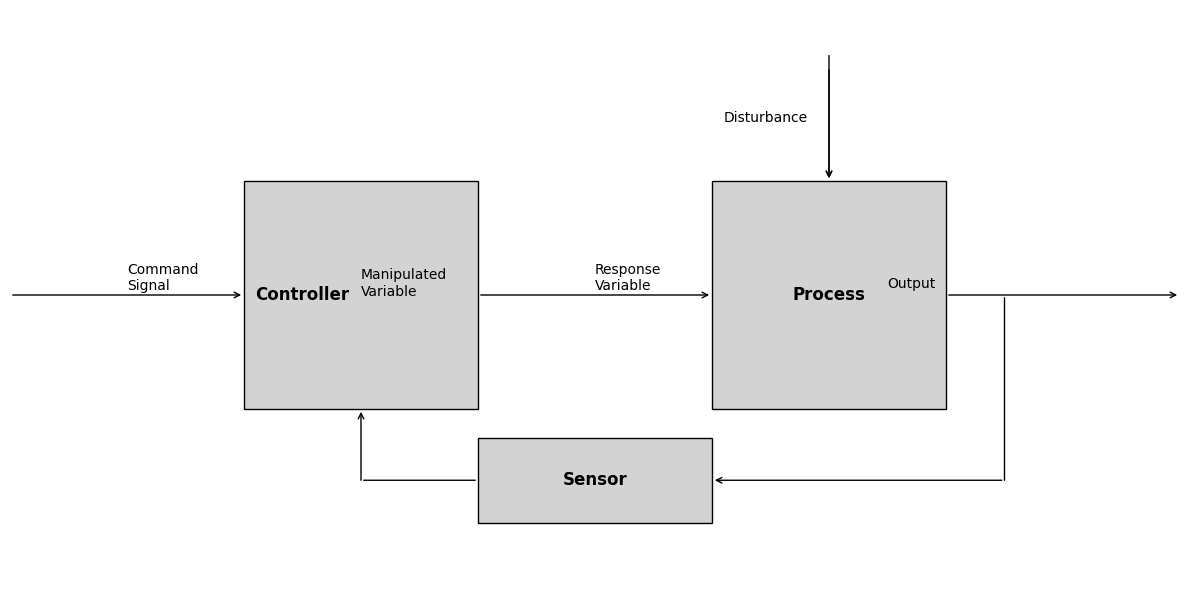

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

# Create a figure and axis
fig, ax = plt.subplots(figsize=(12, 6))

# Create rectangles for blocks
process_rect = patches.Rectangle((0.6, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightgray', label="Process")
controller_rect = patches.Rectangle((0.2, 0.3), 0.2, 0.4, edgecolor='black', facecolor='lightgray', label="Controller")
sensor_rect = patches.Rectangle((0.4, 0.1), 0.2, 0.15, edgecolor='black', facecolor='lightgray', label="Sensor")

# Add rectangles to the axis
ax.add_patch(process_rect)
ax.add_patch(controller_rect)
ax.add_patch(sensor_rect)

# Text inside the blocks
ax.text(0.25, 0.5, 'Controller', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')
ax.text(0.7, 0.5, 'Process', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')
ax.text(0.5, 0.175, 'Sensor', horizontalalignment='center', verticalalignment='center', fontsize=12, fontweight='bold')

# Add arrows using annotate
ax.annotate("", xy=(0.2, 0.5), xytext=(0, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.6, 0.5), xytext=(0.4, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(1, 0.5), xytext=(0.8, 0.5), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.7, 0.7), xytext=(0.7, 0.9), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.7, 0.7), xytext=(0.7, 0.925), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.85, 0.17), xytext=(0.85, 0.5), arrowprops=dict(arrowstyle="-"))
ax.annotate("", xy=(0.6, 0.175), xytext=(0.85, 0.175), arrowprops=dict(arrowstyle="->"))
ax.annotate("", xy=(0.3, 0.175), xytext=(0.4, 0.175), arrowprops=dict(arrowstyle="-"))
ax.annotate("", xy=(0.3, 0.17), xytext=(0.3, 0.3), arrowprops=dict(arrowstyle="<-"))

# Text for arrows
ax.text(0.1, 0.53, 'Command\nSignal', verticalalignment='center', fontsize=10)
ax.text(0.3, 0.52, 'Manipulated\nVariable', verticalalignment='center', fontsize=10)
ax.text(0.5, 0.53, 'Response\nVariable', verticalalignment='center', fontsize=10)
ax.text(0.75, 0.52, 'Output', verticalalignment='center', fontsize=10)
ax.text(0.61, 0.81, 'Disturbance', verticalalignment='center', fontsize=10)
# ax.text(0.43, 0.62, 'Feedback', verticalalignment='center', fontsize=10)

# Set the limits, remove the axes and display
ax.set_xlim(0, 1)
ax.set_ylim(0, 1)
ax.axis('off')
plt.tight_layout()
plt.show()


### Structure of Feedback Control Systems

The mechanism of a feedback control system is an error self-nulling process. The system continually checks for discrepancies between the desired command and the actual output, employing controller actions to mitigate these errors. Such a system is commonly known as a closed-loop system due to its looped structure, facilitating the feedback process.

The components of this system can be understood as follows:

- Command Signal: The desired output or set point.
- Controlled Variable: The actual output of the system.
- Error Signal: Difference between the command signal and controlled variable.
- Controller: It processes the error signal to produce the control signal.
- Plant: The actual system being controlled.
- Sensor: Measures the output of the plant

### Challenges in Feedback Control System

- Sensor Limitations:
One of the primary sources of challenges in the feedback control system is the sensor. The inclusion of the sensor, which was absent in open-loop systems, presents its own set of problems:

    - Noise: The sensor might introduce noise, especially at high frequencies, during measurement. This noise can disrupt the proper functioning of the plant and the controller, thereby reducing the system's efficiency.
    - Solutions to Noise: Installing suitable noise filters can address this issue, ensuring that the high-frequency noise does not interfere with the operation of the loop.

- Controller Requirements:
A significant aspect of the feedback system is its controller. The controller's primary aim is to render the system robust. A robust system implies that the controlled variable closely follows the command signal, even in the presence of external disturbances or variations in plant parameters. Achieving this requires a careful balance between system accuracy and stability, a delicate trade-off that forms the core of feedback control theory.

- Stability Concerns:
As we strive for increased system accuracy, stability might get compromised. This trade-off is an inherent challenge of the feedback structure. Feedback control theory and its designs aim to strike a balance between these conflicting requirements.

### Feedback Control Advantages
Feedback control systems are indispensable, primarily due to their robust nature. Despite their associated challenges, their ability to filter disturbances and adjust to parameter variations makes them superior to open-loop systems. Without feedback control structures, it would be challenging to achieve system accuracy effectively.

### Example

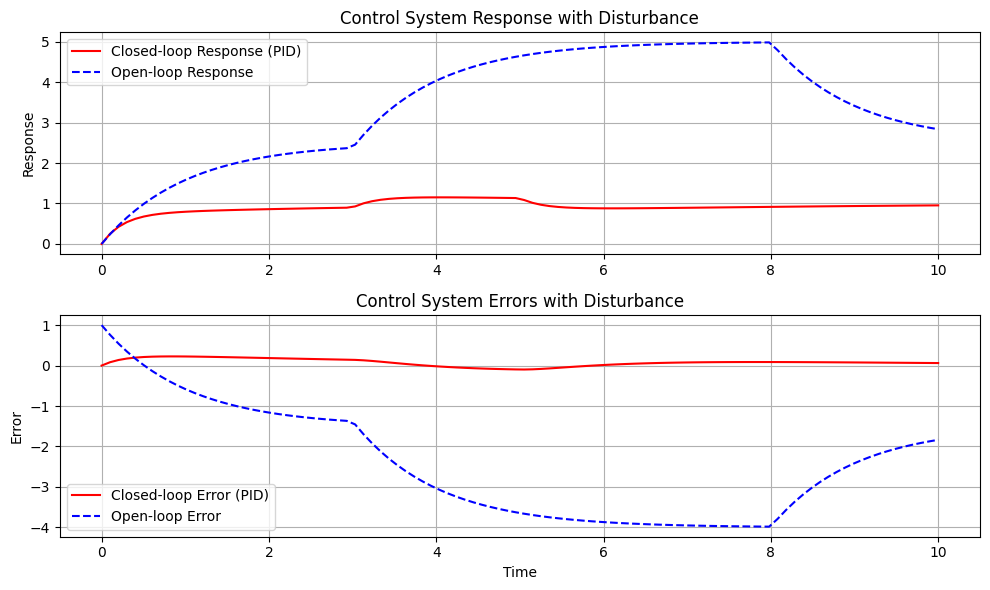

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import odeint

def open_loop_system(y, t, K, tau):
    """Open-loop system model."""
    u = 1  # step input
    if 3 <= t <= 8:  # Adding a disturbance between time 3 and 5
        u += 1.0
    dydt = (-y + K * u) / tau
    return dydt

def closed_loop_system(states, t, K, tau, Ki, Kd):
    """Closed-loop system model with PID control."""
    y, e_prev, e_int = states  # y is system output, e_prev is previous error, e_int is integral of error
    setpoint = 1  # desired setpoint
    disturbance = 0
    
    if 3 <= t <= 5:  # Adding a disturbance between time 3 and 5
        disturbance += 1.0
        
    # Error
    e = setpoint - y
    
    # PID Controller
    u = K * e + Ki * e_int + Kd * (e - e_prev)
    
    dydt = (-y + u + disturbance) / tau  # Disturbance is added directly to the system dynamics
    deintdt = e  # Integral of error over time
    dedt = e - e_prev
    
    return [dydt, dedt, deintdt]


# System parameters
K = 2.5
tau = 1.0
Ki = 1.0  # Integral gain
Kd = 0.5  # Derivative gain

# Time array
t = np.linspace(0, 10, 100)

# Solve ODE for the open-loop system
y_open = odeint(open_loop_system, 0, t, args=(K, tau))
error_open = 1 - y_open.squeeze()  # desired setpoint is 1, so error is 1 - output

# Solve ODE for the closed-loop system
initial_conditions = [0, 0, 0]  # initial values for y, e_prev, and e_int
y_closed, error_closed, _ = odeint(closed_loop_system, initial_conditions, t, args=(K, tau, Ki, Kd)).T

# Plot Responses
plt.figure(figsize=(10,6))
plt.subplot(2, 1, 1)
plt.plot(t, y_closed, 'r-', label='Closed-loop Response (PID)')
plt.plot(t, y_open, 'b--', label='Open-loop Response')
plt.ylabel('Response')
plt.title('Control System Response with Disturbance')
plt.legend()
plt.grid()

# Plot Errors
plt.subplot(2, 1, 2)
plt.plot(t, error_closed, 'r-', label='Closed-loop Error (PID)')
plt.plot(t, error_open, 'b--', label='Open-loop Error')
plt.xlabel('Time')
plt.ylabel('Error')
plt.title('Control System Errors with Disturbance')
plt.legend()
plt.grid()
plt.tight_layout()
plt.show()


The system we're simulating is a basic first-order system. It's one of the simplest dynamical systems used often as a foundational building block in control theory. The equations governing its dynamics, in general, look like:

$$
\tau \frac{dy(t)}{dt} + y(t) = Ku(t) 
$$

Here:
- $\tau$ is the time constant of the system. It gives an idea of how fast the system responds to changes in the input.
- $K$ is the system gain. It tells you how much the system output changes for a given change in the input.
- $u(t)$ is the system input at time $t$.
- $y(t)$ is the system output at time $t$.

The open-loop system directly acts on the system with the input $u(t)$. There's no feedback, so if there's a disturbance or the system isn't behaving as expected, the open-loop system cannot correct for it.

The closed-loop system, on the other hand, uses feedback. The system output $y(t)$ is constantly measured and compared to the desired setpoint to determine the error. A controller then adjusts the system input $u(t)$ based on this error to make the system output match the desired setpoint. This allows the closed-loop system to correct for disturbances and system behavior that deviates from the desired behavior.

In our specific simulation:
- The open-loop system was modeled to show how it reacts directly to an input and a disturbance without any feedback mechanism.
- The closed-loop system was modeled using a simple proportional controller with a derivative term. The controller tries to minimize the error, which is the difference between the desired output (setpoint + disturbance) and the actual system output. This allows the closed-loop system to correct when there's a disturbance or other unexpected behavior.

With this feedback mechanism, the controller can dynamically adjust and correct any deviations, ensuring the system remains stable and performs as desired.

## Design Approaches for Feedback Control Systems

Designing an effective controller is paramount. There are various approaches to this, and they can be categorized as follows:

1. Experimental Approach: This relies on practical experience. A controller is installed based on past experiences and then adjusted in real-time until the desired results are achieved. This method, referred to as controller tuning, is ad hoc and is extensively employed in process control applications.
2. Model-Based or Analytical Approach: For complex systems where control requirements are tight, a model-based approach is more suitable. Here, the system's dynamics are captured in a mathematical model, which is then used to design the controller analytically.
3. Knowledge-Based Approach: This approach is gaining traction, with significant developments in the last decade. Methods like expert control, fuzzy control, neural networks, reinforcement learning fall under this category. The core idea is to utilize qualitative guidelines or rules derived from expert knowledge to design the controller.

For the scope of this course, we will primarily focus on the model-based control. This involves deriving a mathematical model of the physical system, which can be based on physical laws or experimentation.

## Historical Context:
The evolution of control design methods can be broadly categorized into two main eras:

1. Classical Control Design (1940-1960): This period witnessed the development of frequency domain design methods. Techniques like Nyquist Stability methods, Bode plots, and Root Locus plots emerged. They are still very much in use, especially in industrial control applications.
2. Modern Control Design (1960s onwards): Space vehicle control requirements gave birth to state-space techniques, known as Modern Control Design. While these methods are termed "modern," it's crucial to understand that both classical and modern methods are still prevalent and critical in their respective applications.

The term "modern control design" might be a bit misleading. It emerged primarily from the specific requirements of tracking in space vehicles. Yet, in the realm of industrial control, the classical methods of design are still widely prevalent. In fact, about 75% of today's industrial control problems are addressed using these classical techniques.

While modern methods have their origins and advantages, particularly in specialized applications like space vehicles, it is still debatable which method offers more **robustness**. Robustness, after all, is the primary requirement for most systems.

This ongoing debate makes it imperative to forgo the terminology of classical and modern control, as both are equally relevant depending on the application.

For the scope of this course, our primary concentration will be on the **frequency domain methods of design**. This will provide you with a comprehensive understanding of the foundational methods in control design.

However, we won't neglect the state variable methods altogether. Instead, they'll be introduced not from a design perspective but rather for system simulation.
System simulation, when approached through state variable formulation, can be more intuitive and effective.

## Illustrative Examples of Control Systems

It's often helpful to relate theoretical concepts to real-world examples. This helps in understanding the broader applications and nuances of control systems in everyday life.

### Examples of Controlled Systems:
- Bathroom Toilet Tank: A seemingly simple system, but it is, in essence, a feedback control mechanism.
- Automobile Driving: Encompasses various control systems, from speed regulation to power steering.
- Residential Heating: Thermostats and HVAC systems rely on feedback to maintain desired temperatures.
- Hydraulic Steering Mechanism: A critical component for many heavy-duty vehicles and systems.
- Antenna Servo System: Used for tracking and communications.
- Speed Control System: Found in various machines, from industrial setups to home appliances.

> ![Insert a collage or a set of pictures illustrating the above examples.]

Figure 3: Real-world Examples of Control Systems.

## Conclusions

Feedback control systems form the backbone of many modern engineering applications. The ability to provide a mechanism to automatically adjust system behavior based on feedback from outputs makes these systems indispensable. However, the design and implementation of these systems require a comprehensive understanding of their structure, challenges, advantages, and the various approaches available. In subsequent chapters, we'll delve deeper into each of these aspects, providing a more detailed look at the intricacies of feedback control systems.